<a href="https://colab.research.google.com/github/Tanisha2910/Data-Science-Python/blob/master/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import io
import csv
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/"

'93000244939 (2).pdf'
 B612_20170505_181613.jpg
 B612_20170505_181641.jpg
 B612_20170505_181721.jpg
 B612_20170818_234150.jpg
 B612_20170818_235947.jpg
 B612_20170819_000138.jpg
 B612_20170819_000147.jpg
 B612_20170819_000151.jpg
 B612_20170819_000201.jpg
 B612_20170819_000303.jpg
 B612_20170819_000314.jpg
 B612_20170819_000319.jpg
 B612_20170819_000324.jpg
 B612_20170819_000348.jpg
 B612_20170819_000353.jpg
 B612_20170819_000357.jpg
 B612_20170819_000401.jpg
 B612_20170819_000513.jpg
 B612_20170819_000517.jpg
 B612_20170819_000550.jpg
 B612_20170819_000604.jpg
 B612_20170819_000958.jpg
 B612_20170819_001004.jpg
 B612_20170819_001019.jpg
 B612_20170820_165224.jpg
 B612_20170820_165247.jpg
 B612_20170820_165318.jpg
 BeautyPlus_20170820163718_save.jpg
 BeautyPlus_20170820163752_save.jpg
 BeautyPlus_20170820163839_save.jpg
 BeautyPlus_20170820163914_save.jpg
 cccbb89b343c5a9ec4df39fc494e06b0.jpg
'Cognizant Shortlist for Interviews- Galgotias  SLPP.xlsx'
'Colab Notebooks'
 dad_is_calling.m

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train_ctrUa4K (1).csv to train_ctrUa4K (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['train_ctrUa4K (1).csv']))

In [6]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.describe() # Get summary of numerical variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# for non-numerical calues we can look at the frequency  distribution to understand whether they make sense or not
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

**Distribution Analysis**


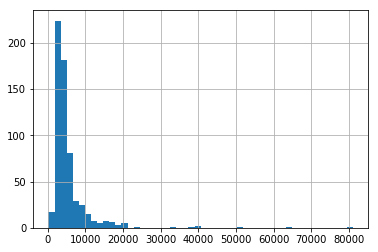

In [9]:
# Plotting histogram for applicant income
df['ApplicantIncome'].hist(bins=50)

# down we can see that there are a few extreme values, this is also the reason why 50 bins are required to depict the distribution clearly


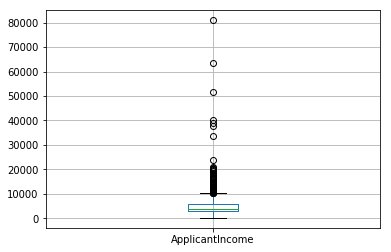

In [10]:
# Boxplot
df.boxplot(column = 'ApplicantIncome')

# down this shows the presence of lot of outliers ,This can be coz of income disparities in the society.
# Part of this can be driven by the fact that we are looking at people with differnt education levels. 

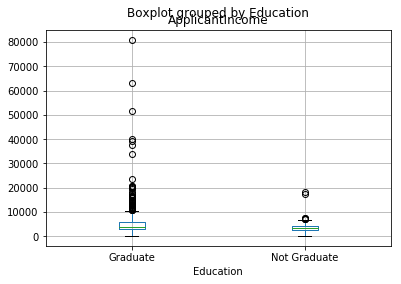

In [11]:
# Let now segragate the income by the education level
df.boxplot(column = 'ApplicantIncome', by = 'Education')

# down We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

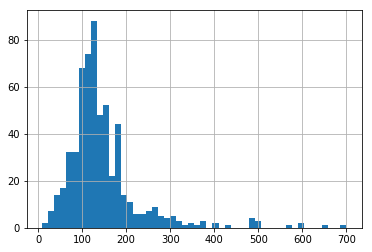

In [12]:
# lets see histogram of loan amount
df['LoanAmount'].hist(bins = 50)

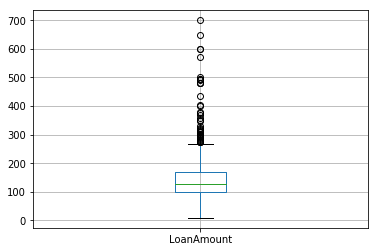

In [13]:
df.boxplot(column = 'LoanAmount')

# Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging.
#  LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding

In [14]:
# Now we will understand categorical variables 

temp1 = df['Credit_History'].value_counts(ascending = True)
temp2 = df.pivot_table(values = 'Loan_Status', index = ['Credit_History'], aggfunc = lambda x: x.map({'Y': 1, 'N' : 0}).mean())
print('Frequency table for credit history')
print(temp1)

print('\nProbability of getting loan for each credit history class:')
print(temp2)

Frequency table for credit history
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

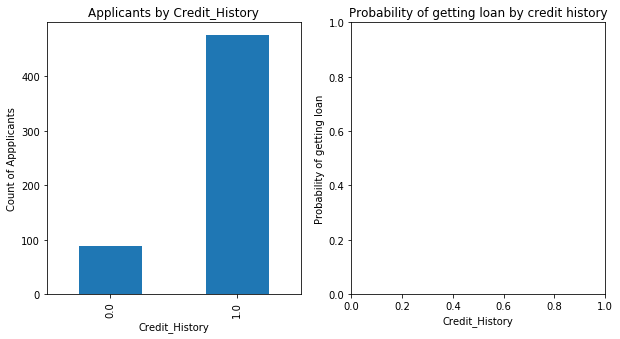

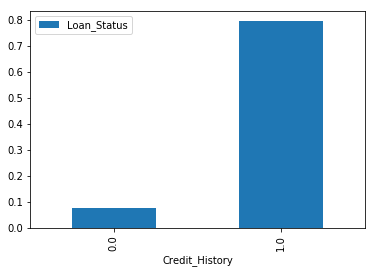

In [15]:
# BAR CHART

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Appplicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")


# below shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. 
# We can plot similar graphs by Married, Self-Employed, Property_Area, etc.

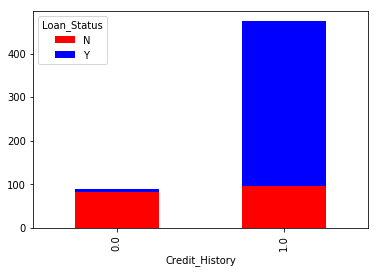

In [16]:
# Alternately, these two plots can also be visualized by combining them in a stacked chart::

temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind = 'bar', stacked = True, color = ['red', 'blue'], grid = False)

**DATA MUGGING**

In [0]:
# While our exploration of the data, we found a few problems in the data set, which needs to be solved before the data is ready for a good model.
# There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
#While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.


In [17]:
#  Checking MISSING VALUES
# Lambda In non-technical language, lambda is an alternative way of defining function. You can define function inline using lambda. 
# It means you can apply a function to some data using a single line of python code.
# It is called anonymous function as the function can be defined without its name. 

df.apply(lambda x: sum(x.isnull()),axis = 0)


# down we can see that missing values are not very higher in no but we can see multiple variables have them ans it should be estimated and added to data


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
# Filling of missing values of Loan Amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [19]:
df['Self_Employed'].value_counts()

# down we can see that 86% values are NO , as there is high probability of success with no so we will replace missing values with no

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
df['Self_Employed'].fillna('No', inplace = True)

In [21]:
# Now we will create a pivot table, which provides us median values for all the groups of unique values of self_employed and education
# Next we will define a func ehich returns the values of these cells and apply it to fill missing values of loan amount

table  = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)

# Define function to return value of this pivot table
def fage(x):
  return table.loc[x['Self_Employed'], x['Education']]

# Replace missing values

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis = 1), inplace = True)

TypeError: ignored

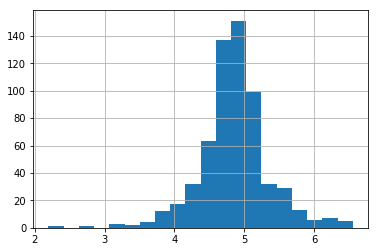

In [22]:
# How to treat extreme values in distribution of Loan Amount 
# Some people might apply high value loan for specific needs, so instead of treating them as outliers, lets try a log transformation to nullify their effect
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)

In [0]:
# Above distribution looks much closer to normal and effect of extreme values has been significantly subdided
# Coming to Applicant Income, one intution can be that some applicants have lower income but strong support from Co-applicants. so it might be a good idea to combine both of them


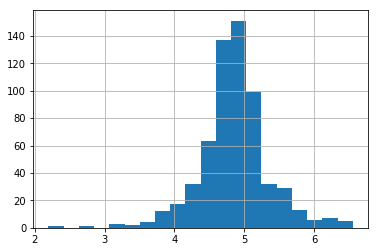

In [23]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins = 20)

**BUILDING PREDICTIVE MODEL**

In [0]:
# After, we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set
# sklearn is most commonly used python library for this
# since sklearn requires all inputs to numeric so we convert all our categorical variables into numeric by encoding
# before that we will fill all the missing values in the data set first

In [0]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [25]:
# encoding
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for i in var_mod:
  df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [51]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [0]:
# Now we will definr generic classification function , which takes a model as input and determines the accuracy and Cross-validation scores
# Import models from skilearn module :
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Generic function for making a classification model and accessing performance"
def classification_model(model, data, predictors, outcome):
  # fit the model:
  model.fit(data[predictors], data[outcome])
  
  # Make predictions on the training set:
  predictions = model.predict(data[predictors])
  
  # Print accuracy
  accuracy = metrics.accuracy_score(predictions, data[outcome])
  print("Accuracy : %s" % "{0:3%}".format(accuracy))
  
  # Perform K-Fold cross validation with 5 folds
  
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data[predictors]):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algo
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target 
    model.fit(train_predictors, train_target)
    
    # Record error form each cross-validation run
    error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
    
  print("cross validation score : %s" % "{0:.3%}".format(np.mean(error)))
  
  # Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
  
 

LOGISTIC REGRESSION

In [74]:
# We will make a logistic regression model
# one way is to take all the variables to the model but this will result in overfitting
# we can easily make somne hypothesis , the chances of getting loan will e higher for:
# 1. Applicants having a credit history, 2. applicants with higher applicant and co-applicant incomes, 3. applicants with high education level. 4-properties in urban areas with high growth perspectives

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.944625%
cross validation score : 80.946%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

DECISION TREE

In [77]:
# decision tree is another method for making a predictive model. It is known to provide higher accuracythan logistic regression model
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.944625%
cross validation score : 80.946%


In [79]:
# here the model is based on categorical variables is unable to have an impact coz Credit History is dominating over them.
# lets try a  few numerical variable:
# We can try a combination of variable
predictor_var = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount_log']
classification_model(model, df, predictor_var, outcome_var)

# Down we can see that although the accuracy went up on adding variables, the cress validation error went down 
# This is the result of model ver-fitting the data, lets try an even more sophisticted algo and see if it helps

Accuracy : 89.413681%
cross validation score : 68.722%


RANDOM FOREST

In [80]:
# It is another algo for classification problem.
# An adv with random forest is that we can meke it work with all the features and it returns a feature importance matrix
# which can be used to select features
model = RandomForestClassifier(n_estimators = 100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
                   'LoanAmount_log', 'TotalIncome_log']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 100.000000%
cross validation score : 78.015%


In [0]:
# Above we can see that the accuracy is 100% for training set. This is ultimate case of overfitting and can be resolved in 2 ways:
# 1. Reducing the no of predictors 2. Tuning the model parameters
# First we will see the feature importance matrix from which we'll take the most imp features

In [81]:
# Create a series with feature importance
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending = False)
print(featimp)

Credit_History      0.273382
TotalIncome_log     0.268328
LoanAmount_log      0.222846
Dependents          0.051165
Property_Area       0.049078
Loan_Amount_Term    0.042767
Education           0.024726
Married             0.024070
Self_Employed       0.022723
Gender              0.020915
dtype: float64


In [82]:
# Lets use the top 5 variables for creating a model
# Also we will modify the parameters of ramdom forest model a little bit:
model = RandomForestClassifier(n_estimators = 25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log', 'LoanAmount_log', 'Credit_History', 'Dependents', 'Property_Area']
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 82.247557%
cross validation score : 80.460%


In [0]:
# above notice that althoug the accuracy reduced but cross validation score increased showing that the model is generalizing well.
# Note that random forest models are not exactly repeatable. Different runs will result in slight variations coz of randomization